<a href="https://colab.research.google.com/github/Raphael181/Raphael181/blob/main/Linear_Regression_Health_Costs_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

     |████████████████████████████████| 1.0MB 4.0MB/s 


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-05-11 17:19:01--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2021-05-11 17:19:02 (3.23 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
print(dataset.head())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86


In [ ]:
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [ ]:
print(dataset.describe())

               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000


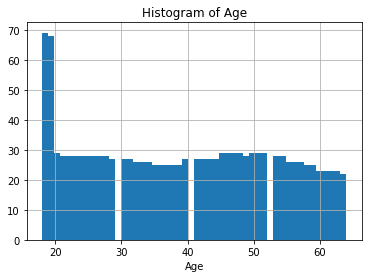

In [ ]:
dataset['age'].hist(bins = 50)
plt.xlabel("Age")
plt.title("Histogram of Age")
plt.show()

In [ ]:
#One hot encode our gender columns

dummy_smoker = pd.get_dummies(dataset['smoker'])

print(dummy_smoker)



      no  yes
0      0    1
1      1    0
2      1    0
3      1    0
4      1    0
...   ..  ...
1333   1    0
1334   1    0
1335   1    0
1336   1    0
1337   0    1

[1338 rows x 2 columns]


In [ ]:
dataset = pd.merge(left = dataset, right = dummy_smoker, left_index=True, right_index=True)

print(dataset)

      age   bmi  children smoker     region  expenses  female  male  no  yes
0      19  27.9         0    yes  southwest  16884.92       1     0   0    1
1      18  33.8         1     no  southeast   1725.55       0     1   1    0
2      28  33.0         3     no  southeast   4449.46       0     1   1    0
3      33  22.7         0     no  northwest  21984.47       0     1   1    0
4      32  28.9         0     no  northwest   3866.86       0     1   1    0
...   ...   ...       ...    ...        ...       ...     ...   ...  ..  ...
1333   50  31.0         3     no  northwest  10600.55       0     1   1    0
1334   18  31.9         0     no  northeast   2205.98       1     0   1    0
1335   18  36.9         0     no  southeast   1629.83       1     0   1    0
1336   21  25.8         0     no  southwest   2007.95       1     0   1    0
1337   61  29.1         0    yes  northwest  29141.36       1     0   0    1

[1338 rows x 10 columns]


In [ ]:
#drop the sex dataset
dataset = dataset.drop(['smoker'], axis = 1)
print(dataset)

      age   bmi  children     region  expenses  female  male  no  yes
0      19  27.9         0  southwest  16884.92       1     0   0    1
1      18  33.8         1  southeast   1725.55       0     1   1    0
2      28  33.0         3  southeast   4449.46       0     1   1    0
3      33  22.7         0  northwest  21984.47       0     1   1    0
4      32  28.9         0  northwest   3866.86       0     1   1    0
...   ...   ...       ...        ...       ...     ...   ...  ..  ...
1333   50  31.0         3  northwest  10600.55       0     1   1    0
1334   18  31.9         0  northeast   2205.98       1     0   1    0
1335   18  36.9         0  southeast   1629.83       1     0   1    0
1336   21  25.8         0  southwest   2007.95       1     0   1    0
1337   61  29.1         0  northwest  29141.36       1     0   0    1

[1338 rows x 9 columns]


In [ ]:
#time to scale our data
dummy_region = pd.get_dummies(dataset['region'])

dataset = pd.merge(left = dataset, right=dummy_region, left_index=True, right_index=True)

dataset = dataset.drop(['region'] , axis = 1)
print(dataset)

      age   bmi  children  expenses  ...  northeast  northwest  southeast  southwest
0      19  27.9         0  16884.92  ...          0          0          0          1
1      18  33.8         1   1725.55  ...          0          0          1          0
2      28  33.0         3   4449.46  ...          0          0          1          0
3      33  22.7         0  21984.47  ...          0          1          0          0
4      32  28.9         0   3866.86  ...          0          1          0          0
...   ...   ...       ...       ...  ...        ...        ...        ...        ...
1333   50  31.0         3  10600.55  ...          0          1          0          0
1334   18  31.9         0   2205.98  ...          1          0          0          0
1335   18  36.9         0   1629.83  ...          0          0          1          0
1336   21  25.8         0   2007.95  ...          0          0          0          1
1337   61  29.1         0  29141.36  ...          0          1   

In [ ]:
#Now our data is all numerical, it is ready for scaling
df = dataset

df_prescaled = df.copy()

#Drop the expenses
df_scaled = df.drop(['expenses'], axis = 1)

from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)

In [ ]:
#convert the objects back into a dataframe
cols = df.columns.tolist()
cols.remove('expenses')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index = df.index)
df_scaled = pd.concat([df_scaled, df['expenses']], axis = 1)
df = df_scaled.copy()

print(df)

           age       bmi  children  ...  southeast  southwest  expenses
0    -1.438764 -0.453646 -0.908614  ...  -0.611324   1.765481  16884.92
1    -1.509965  0.514186 -0.078767  ...   1.635795  -0.566418   1725.55
2    -0.797954  0.382954  1.580926  ...   1.635795  -0.566418   4449.46
3    -0.441948 -1.306650 -0.908614  ...  -0.611324  -0.566418  21984.47
4    -0.513149 -0.289606 -0.908614  ...  -0.611324  -0.566418   3866.86
...        ...       ...       ...  ...        ...        ...       ...
1333  0.768473  0.054876  1.580926  ...  -0.611324  -0.566418  10600.55
1334 -1.509965  0.202511 -0.908614  ...  -0.611324  -0.566418   2205.98
1335 -1.509965  1.022707 -0.908614  ...   1.635795  -0.566418   1629.83
1336 -1.296362 -0.798128 -0.908614  ...  -0.611324   1.765481   2007.95
1337  1.551686 -0.256799 -0.908614  ...  -0.611324  -0.566418  29141.36

[1338 rows x 12 columns]


In [ ]:
#Seperating into testing and training data
x = df.loc[:, df.columns != 'expenses']
y = df.loc[:, 'expenses']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#Building our regression model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 12,145
Trainable params: 12,145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model
model.compile(loss = 'mse', optimizer='adam', metrics = ['mse', 'mae'])
#Train the model
model.fit(x_train, y_train, epochs = 7)

Epoch 1/7
34/34 [==============================] - 1s 2ms/step - loss: 33712537.9429 - mse: 33712537.9429 - mae: 4056.9472
Epoch 2/7
34/34 [==============================] - 0s 2ms/step - loss: 28852977.6571 - mse: 28852977.6571 - mae: 3761.2838
Epoch 3/7
34/34 [==============================] - 0s 2ms/step - loss: 33723701.3714 - mse: 33723701.3714 - mae: 3953.3280
Epoch 4/7
34/34 [==============================] - 0s 2ms/step - loss: 31621679.2571 - mse: 31621679.2571 - mae: 3799.7939
Epoch 5/7
34/34 [==============================] - 0s 2ms/step - loss: 27888032.5143 - mse: 27888032.5143 - mae: 3604.6351
Epoch 6/7
34/34 [==============================] - 0s 2ms/step - loss: 30691206.5714 - mse: 30691206.5714 - mae: 3698.0869
Epoch 7/7
34/34 [==============================] - 0s 2ms/step - loss: 30937733.0286 - mse: 30937733.0286 - mae: 3838.6875


9/9 - 0s - loss: 32141630.0000 - mse: 32141630.0000 - mae: 3479.2981
Testing set Mean Abs Error: 3479.30 expenses
You passed the challenge. Great job!


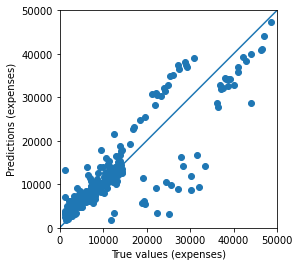

In [ ]:
# Test model by checking how well the model generalizes using the test set.
loss, mse, mae = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:3.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)